# Apêndice A.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

## Importações.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sys
import xml.etree.ElementTree as ET

import tensorflow as tf
from tensorflow import keras
from keras import layers


tf.test.gpu_device_name()

flag = 1 #treinar modelo
flag = 0 #carregar modelo !! (Comente para treinar e salvar)

2021-09-14 16:17:31.912149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-14 16:17:31.912203: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-14 16:17:34.562823: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-14 16:17:34.566719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-14 16:17:34.566737: W tensorflow/stream_ex

## Configurações.

In [3]:
input_shape = (128,128,3)
batch = 32

vagas = 40
pontos = vagas*4

## Importação do Dataset.

In [4]:
BASE_PATH = ['../..','datasets']
DATASET_DIR=['PKLot','UFPR05']

DATASET_DIR = os.path.join(BASE_PATH[0],BASE_PATH[1],
                           DATASET_DIR[0],DATASET_DIR[1])
DATASET_DIR

'../../datasets/PKLot/UFPR05'

In [5]:
BASE_PATH = ['../..','datasets']
DATASET_DIR=['PKLot','UFPR05']

DATASET_DIR = os.path.join(BASE_PATH[0],BASE_PATH[1],
                           DATASET_DIR[0],DATASET_DIR[1])

DADOS_DIR = os.path.join(DATASET_DIR,'output')
X = tf.keras.preprocessing.image_dataset_from_directory(DADOS_DIR, image_size=input_shape[:2], batch_size=batch, label_mode='binary',
                                                        seed=1, color_mode='rgb', validation_split=0.3, subset = 'training')


X_val = tf.keras.preprocessing.image_dataset_from_directory(DADOS_DIR, image_size=input_shape[:2], batch_size=batch, label_mode='binary',
                                                        seed=1, color_mode='rgb', validation_split=0.3, subset = 'validation')


print('\nClasses: {} em {}'.format(X.class_names,DADOS_DIR))

Found 166080 files belonging to 2 classes.
Using 116256 files for training.
Found 166080 files belonging to 2 classes.
Using 49824 files for validation.

Classes: ['livre', 'ocupada'] em ../../datasets/PKLot/UFPR05/output


In [6]:
IMAGE_DIR = os.path.join(DATASET_DIR,'todas')
XML_DIR = IMAGE_DIR


IMAGE_LIST = []
XML_LIST = []
def criarLista():
    for file in os.listdir(IMAGE_DIR):
        if file.endswith(".jpg"):

            file = os.path.join(IMAGE_DIR,file)
            IMAGE_LIST.append(file)
    IMAGE_LIST.sort()

    for file in os.listdir(IMAGE_DIR):
        if file.endswith(".xml"):

            file = os.path.join(XML_DIR,file)
            XML_LIST.append(file)
    XML_LIST.sort()


criarLista()
#debug
print(IMAGE_DIR)
print(XML_DIR)
print(IMAGE_LIST[:2])
print(XML_LIST[:2])

../../datasets/PKLot/UFPR05/todas
../../datasets/PKLot/UFPR05/todas
['../../datasets/PKLot/UFPR05/todas/2013-02-22_06_05_00.jpg', '../../datasets/PKLot/UFPR05/todas/2013-02-22_06_10_00.jpg']
['../../datasets/PKLot/UFPR05/todas/2013-02-22_06_05_00.xml', '../../datasets/PKLot/UFPR05/todas/2013-02-22_06_10_00.xml']


## Construindo o modelo e compilando.

In [7]:
def modelo():
    model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(filters=32,kernel_size=5,strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=3),
        layers.BatchNormalization(),
        
        layers.Conv2D(32,3, activation="relu"),
        layers.Conv2D(32,3, activation="relu"),
        layers.MaxPooling2D(2),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(48,activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid"),
    ]
)

    return model

model = modelo()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, "./images/arquitetura.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20, 20, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

## Testando os Labels carregadas da base de treinamento.

2021-09-14 16:17:41.820316: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


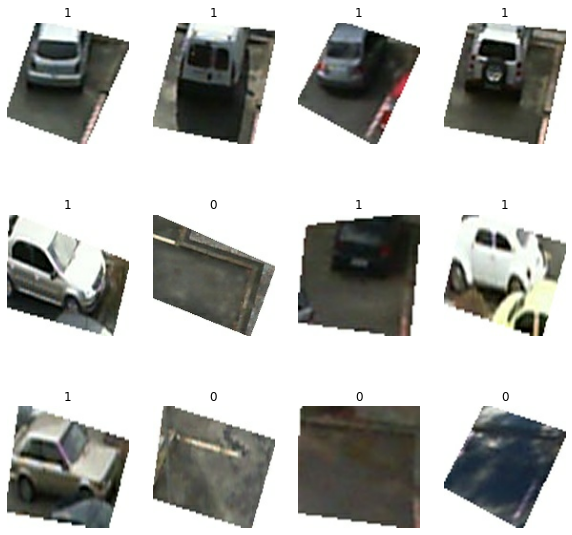

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in X.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Exemplo de Imagem não segmentada.

(-0.5, 1279.5, 719.5, -0.5)

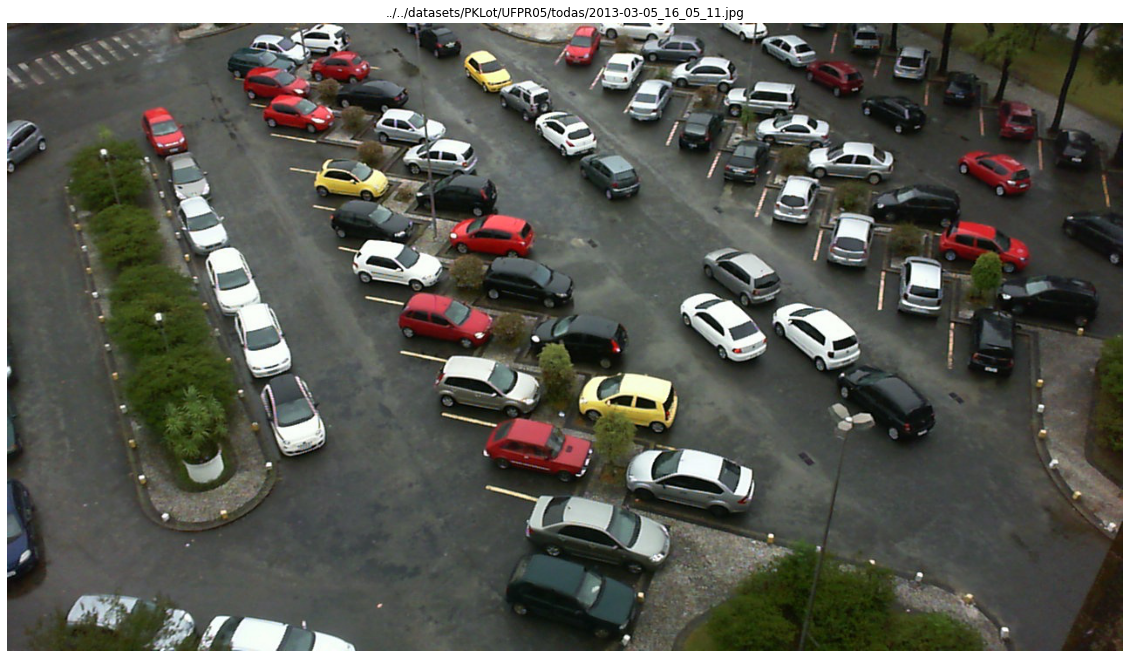

In [9]:
sort = np.random.randint(len(IMAGE_LIST))

fig = plt.figure(figsize=(20, 20))
image = plt.imread(IMAGE_LIST[sort])
plt.imshow(image)
plt.title(IMAGE_LIST[sort])
plt.axis("off")

## Treinando o modelo.

In [10]:
%%time

if flag:
    model.fit(X, epochs=10)
else:
    #LOAD_DIR = os.path.split(DATASET_DIR)[0] # Separa (head,tail) -> Indice [0] = head
    LOAD_DIR = os.path.join(DATASET_DIR,'model')

    model = keras.models.load_model(LOAD_DIR)
    

CPU times: user 6.66 s, sys: 310 ms, total: 6.97 s
Wall time: 6.97 s


## Validação do modelo treinado. (testando na base de dados de validação)

In [11]:
if flag:
    score = model.evaluate(X_val, verbose=2)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

## Salvando o modelo treinado.

In [12]:
if flag:
    SAVE_DIR = os.path.split(DATASET_DIR)[0] # Separa (head,tail) -> Indice [0] = head
    SAVE_DIR = os.path.join(DATASET_DIR,'model')
    model.save(
        SAVE_DIR,
        overwrite=False,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )

## Validação individual (random) na base de treinamento

In [13]:
path = X.file_paths[np.random.randint(len(X.file_paths))]
img = keras.preprocessing.image.load_img(path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,  0)

predictions = model.predict(img_array)
score = predictions[0]

print(
    'Vaga livre: %.2f porcento.\nVaga ocupada %.2f porcento.'
    % (100 * (1 - score), 100 * score)
)

#plot = plt.imread(path)
#plt.imshow(img,cmap='gray')
plt.imshow(img)

ValueError: in user code:

    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/pedrodsk/tcc_env/lib/python3.9/site-packages/keras/engine/input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_3: expected shape=(None, 160, 160, 3), found shape=(None, 128, 128, 3)


## Validação individual (random) no Banco de testes

In [ ]:
path = X_val.file_paths[np.random.randint(len(X_val.file_paths))]
img = keras.preprocessing.image.load_img(path, target_size=input_shape[:2])
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,  0)

predictions = model.predict(img_array)
score = predictions[0]

print(
    'Vaga livre: %.2f porcento.\nVaga ocupada %.2f porcento.'
    % (100 * (1 - score), 100 * score)
)

#plot = plt.imread(path)
plt.imshow(img)


In [ ]:
tree = ET.parse(XML_LIST[0])
root = tree.getroot()

pts = np.empty(0,np.int32)
vaga = np.empty(0,np.int32)

for neighbor in root.iter('point'):
    #print(neighbor.attrib)
    x,y = neighbor.attrib.values()
    x = int(x)
    y = int(y)
    a = [x,y]
    pts = np.append(pts,[x,y])
    
for neighbor in root.iter('space'):
    #print(neighbor.attrib)
    if(len(neighbor.attrib.values())==2):
        _,occupied = neighbor.attrib.values()
        occupied = int(occupied)
    if(len(neighbor.attrib.values())==1):
        occupied=0
        
    vaga = np.append(vaga,occupied)

#debug
print(pts[0:4])
print(vaga[0:40])

paresXY = np.array(np.zeros((pontos,2)),np.int32) 
j=0
for i in range(pontos):
    paresXY[i] = pts[j:j+2]
    j = j+2

#debug
paresXY[0:4]

In [ ]:
def crop(j=0,i=0,vaga=2,lista=5):
    rect = cv2.boundingRect(paresXY[j:j+4])
    x,y,w,h = rect
    croped = im2[y:y+h, x:x+w].copy()

    pts = paresXY[j:j+4] - paresXY[j:j+4].min(axis=0)
    mask = np.zeros(croped.shape[:2], croped.dtype)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

    ## (3) do bit-op
    dst = cv2.bitwise_and(croped, croped, mask=mask) #background preto

    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    dst2 = bg+ dst #background branco
    
    image = cv2.resize(dst2, (128,128), interpolation = cv2.INTER_CUBIC)
    
    img = image.copy()
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,  0)

    predictions = model.predict(img_array)
    score = predictions[0]
    score = float(score)
    return score
    

In [ ]:
def juntar(im,im2,scale=80):
    
    img = np.hstack((im2, im))
    
    scale_percent = scale # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  
    return resized

In [ ]:
for i in range (10): #só repetição
    
    sort = np.random.randint(len(IMAGE_LIST))
    im = cv2.imread(IMAGE_LIST[sort])
    im2 = im.copy()
    if im is None:
        sys.exit("A imagem não foi carregada.")

    j=0
    contador = 0
    for i in range(len(paresXY)//4):

        score = crop(j,i,vaga[i])
        #print(score)
        if((score)<0.7):
            cv2.polylines(im,[paresXY[j:j+4]],True,(0,255,255),2)
            contador = contador +1
            print(score)
        j=j+4
        
        

    cv2.putText(im,str(contador),(10,700), cv2.FONT_HERSHEY_SIMPLEX, 4,(255,255,255),5,cv2.LINE_AA)
    img_junta = juntar(im,im2,70)

    cv2.imshow(IMAGE_LIST[sort], img_junta)
    k = cv2.waitKey(3000)
    cv2.destroyAllWindows()
# if k == ord('q'):
#     cv2.destroyAllWindows()

#image = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
#plt.imshow(image)

In [ ]:
np.random.randint(len(IMAGE_LIST))
    

In [ ]:
X_val.file_paths[np.random.randint(len(X_val.file_paths))]

## Debug 